# SymPy Example

SymPy is one of the most well-known Python library to do Symbolic Math.

In [2]:
from sympy import sqrt, atan, Symbol, init_printing, sin, cos, plot, Integer
from sympy.functions import Abs
init_printing(use_latex='mathjax') 

In [3]:
from sympy.vector import CoordSysCartesian
R = CoordSysCartesian('R')
i,j,k = R
x,y,z = R.x,R.y,R.z
grad = R.delop
cross = R.delop.cross

Let's create an Electric potential :

$$ V(x,y,z) = x+y+z $$

In [4]:
potential = x + y + z
potential

R_x + R_y + R_z

In [5]:
potential_gradient = grad(potential)
potential_gradient

⎛ ∂                   ⎞ R_i + ⎛ ∂                   ⎞ R_j + ⎛ ∂               
⎜────(R_x + R_y + R_z)⎟       ⎜────(R_x + R_y + R_z)⎟       ⎜────(R_x + R_y + 
⎝∂R_x                 ⎠       ⎝∂R_y                 ⎠       ⎝∂R_z             

    ⎞ R_k
R_z)⎟    
    ⎠    

Here we haven't really simplyfied the potential, we can tell SymPy to actually compute the Electric field

In [6]:
potential_gradient.doit()

R_i + R_j + R_k

It is completelty reasonable to define parameter using varaibles, including greek variables, which make it relatively easy to compare notation with papers.

In [7]:
Ωp = Symbol('\Omega^+') 
r = sqrt(x**2+y**2)
θ = atan(y/x)

In [8]:
vec = (-sin(θ)*i + cos(θ)*j)*Ωp
vec

⎛   -\Omega⁺⋅R_y     ⎞ R_i + ⎛    \Omega⁺     ⎞ R_j
⎜────────────────────⎟       ⎜────────────────⎟    
⎜      __________    ⎟       ⎜      __________⎟    
⎜     ╱        2     ⎟       ⎜     ╱        2 ⎟    
⎜    ╱      R_y      ⎟       ⎜    ╱      R_y  ⎟    
⎜   ╱   1 + ──── ⋅R_x⎟       ⎜   ╱   1 + ──── ⎟    
⎜  ╱           2     ⎟       ⎜  ╱           2 ⎟    
⎝╲╱         R_x      ⎠       ⎝╲╱         R_x  ⎠    

In [9]:
pcurl = cross(vec).doit().simplify()
pcurl

⎛      \Omega⁺       ⎞ R_k
⎜────────────────────⎟    
⎜      __________    ⎟    
⎜     ╱        2     ⎟    
⎜    ╱      R_y      ⎟    
⎜   ╱   1 + ──── ⋅R_x⎟    
⎜  ╱           2     ⎟    
⎝╲╱         R_x      ⎠    

In [10]:
pcurl.dot(k)

      \Omega⁺       
────────────────────
      __________    
     ╱        2     
    ╱      R_y      
   ╱   1 + ──── ⋅R_x
  ╱           2     
╲╱         R_x      

In [11]:
pcurl.dot(k).subs({R.y:i/10, Ωp:1})

TypeError: -1 cannot be interpreted correctly

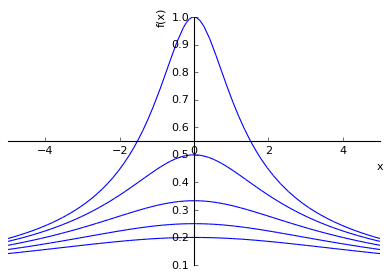

In [12]:
%matplotlib inline
import numpy as np
exprs = []
x = Symbol('x')
for i in np.arange(1,6):
    exprs.append(Abs(pcurl.dot(k)).subs({R.x:x, R.y:i, Ωp:1}))
ax = plot(*exprs,(x,-5,5))

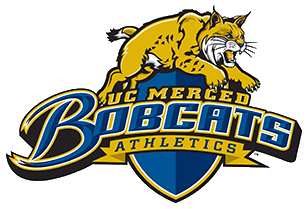

In [13]:
from IPython.display import Image
Image('https://upload.wikimedia.org/wikipedia/en/a/a2/Ucm_bobcats_logo.png')

## Interactivity    

In [14]:
from ipywidgets import interact
from IPython.display import display
from sympy import Symbol, Eq, factor, init_printing


In [15]:
x = Symbol('x')
def factorit(n):
    display(Eq(x**n-1, factor(x**n-1)))

In [16]:
factorit(12)

 12                       ⎛ 2    ⎞ ⎛ 2        ⎞ ⎛ 2        ⎞ ⎛ 4    2    ⎞
x   - 1 = (x - 1)⋅(x + 1)⋅⎝x  + 1⎠⋅⎝x  - x + 1⎠⋅⎝x  + x + 1⎠⋅⎝x  - x  + 1⎠

In [17]:
interact(factorit, n=(2,40));

 20                       ⎛ 2    ⎞ ⎛ 4    3    2        ⎞ ⎛ 4    3    2       
x   - 1 = (x - 1)⋅(x + 1)⋅⎝x  + 1⎠⋅⎝x  - x  + x  - x + 1⎠⋅⎝x  + x  + x  + x + 

 ⎞ ⎛ 8    6    4    2    ⎞
1⎠⋅⎝x  - x  + x  - x  + 1⎠